# Exercises in neural network and deep learning II

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow import keras
from tensorflow.keras import layers

## Exercise 1

In this exercise, we will use the titanic dataset to build a neural network classifier for the target variable `Survived`. In this exercise, all the necessary steps are broken down to small individual task you should do. So, do the following tasks:

1. Load in the titanic dataset (on Moodle as "titanic_survival_data.csv"), select the columns "Pclass", "Sex", "Age", and "Fare" for the feature set X and "Survived" for the target variable y.
2. For the columns "Age" and "Fare", replace the missing values with the column's mean.
3. Turn the variables "Pclass" and "Sex" into dummy variables.
4. Do a train-test split of the data
5. Scale the X training dataset, using the standard scaler.
6. Transform the X test dataset with the same scaler fitted in task 5.
7. Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.
8. Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.
9. Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.
10. Plot the training and validation loss and decide on a best number of epochs.
11. Rebuild and retrain the model for the number of epochs decided in task 10 above.
12. Evaluate the model on the test dataset to get the test accuracy.
13. Calculate precision, recall, and f1-score for the model on the test dataset.
14. Plot the Confusion matrix for the test dataset.

### 1. Load in the titanic dataset (on Moodle as "titanic_survival_data.csv"), select the columns "Pclass", "Sex", "Age", and "Fare" for the feature set X and "Survived" for the target variable y.

In [106]:
df = pd.read_csv("../Notebooks and data-15/titanic_survival_data.csv")

In [107]:
X = df[["Pclass", "Sex", "Age", "Fare"]]
X.head(5)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.250
1,1,female,38.0,712.833
2,3,female,26.0,7.925
3,1,female,35.0,53.100
4,3,male,35.0,8.050


In [108]:
y = df["Survived"]

### 2. For the columns "Age" and "Fare", replace the missing values with the column's mean.

In [109]:
X.isna().sum()

Pclass      0
Sex         0
Age       177
Fare       23
dtype: int64

In [110]:
import warnings
warnings.filterwarnings("ignore")
X["Age"].fillna((X["Age"].mean()), inplace=True) 

In [111]:
X["Fare"].fillna((X["Fare"].mean()), inplace=True)

### 3. Turn the variables "Pclass" and "Sex" into dummy variables.

In [112]:
X = X.join(pd.get_dummies(X["Pclass"], drop_first=True, dtype=int))
X = X.join(pd.get_dummies(X["Sex"], drop_first=True, dtype=int))
X = X.drop(columns = ["Pclass", "Sex"])

In [113]:
X

,Age,Fare,2,3,male
0,22.000000,7.250,0,1,1
1,38.000000,712.833,0,0,0
2,26.000000,7.925,0,1,0
3,35.000000,53.100,0,0,0
4,35.000000,8.050,0,1,1
...,...,...,...,...,...
886,27.000000,13.000,1,0,1
887,19.000000,30.000,0,0,0
888,29.679272,23.450,0,1,0
889,26.000000,30.000,0,0,1


### 4. Do a train-test split of the data

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 5. Scale the X training dataset, using the standard scaler

In [115]:
X_train.columns = X_train.columns.astype(str) # all the columns have to be strings

In [125]:
X_test.columns = X_test.columns.astype(str) # all the columns have to be strings

In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [122]:
X_train

array([[ 1.88979087,  2.88005395, -0.51516287, -1.13679712,  0.72677722],
       [ 0.01059081, -0.46607945, -0.51516287,  0.87966444,  0.72677722],
       [-0.35096447,  2.19614252,  1.94113369, -1.13679712,  0.72677722],
       ...,
       [ 0.88531434,  0.3691354 , -0.51516287,  0.87966444,  0.72677722],
       [-1.20090615,  0.22891869, -0.51516287, -1.13679712, -1.37593746],
       [-0.66003417,  4.57099441, -0.51516287, -1.13679712,  0.72677722]])

### 6. Transform the X test dataset with the same scaler fitted in task 5.

In [126]:
scaler.transform(X_test)

array([[ 0.01059081,  0.44478711, -0.51516287,  0.87966444,  0.72677722],
       [ 0.11264008, -0.49933295,  1.94113369, -1.13679712,  0.72677722],
       [-0.7373016 , -0.51645851, -0.51516287,  0.87966444,  0.72677722],
       ...,
       [-2.20538269,  0.47776793, -0.51516287,  0.87966444, -1.37593746],
       [ 0.01059081,  0.44478711, -0.51516287,  0.87966444, -1.37593746],
       [-0.66003417, -0.51645851, -0.51516287,  0.87966444,  0.72677722]])

### 7. Turn the training and test data (both Xs and ys) into numpy arrays using the method .to_numpy().

In [129]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [158]:
X_test

array([[ 29.67927171, 152.458     ,   0.        ,   1.        ,
          1.        ],
       [ 31.        ,  10.5       ,   1.        ,   0.        ,
          1.        ],
       [ 20.        ,   7.925     ,   0.        ,   1.        ,
          1.        ],
       ...,
       [  1.        , 157.417     ,   0.        ,   1.        ,
          0.        ],
       [ 29.67927171, 152.458     ,   0.        ,   1.        ,
          0.        ],
       [ 21.        ,   7.925     ,   0.        ,   1.        ,
          1.        ]])

### 8. Create a neural network model with two hidden dense layers with 16 neurons in each and the relu activation function. The final output layer should have one neuron and the sigmoid activation function.

In [186]:
def setup_model():
    model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
    return model

In [187]:
model = setup_model()

### 9. Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument validation_split=0.2 to the fit method.

In [188]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5264 - loss: 0.7221 - val_accuracy: 0.6417 - val_loss: 0.6629
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5847 - loss: 0.6856 - val_accuracy: 0.6667 - val_loss: 0.6392
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5917 - loss: 0.6633 - val_accuracy: 0.7000 - val_loss: 0.6165
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6332 - loss: 0.6457 - val_accuracy: 0.7167 - val_loss: 0.5962
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6319 - loss: 0.6405 - val_accuracy: 0.7417 - val_loss: 0.5786
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6704 - loss: 0.6223 - val_accuracy: 0.8000 - val_loss: 0.5584
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7166 - loss: 0.6088 - val_accuracy: 0.8250 - val_loss: 0.5419
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7563 - loss: 0.5808 - val_accuracy: 0.8333 - val_loss: 0.5248
Ep

In [191]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.8805038928985596
Test accuracy: 0.5762711763381958


### 10. Plot the training and validation loss and decide on a best number of epochs.

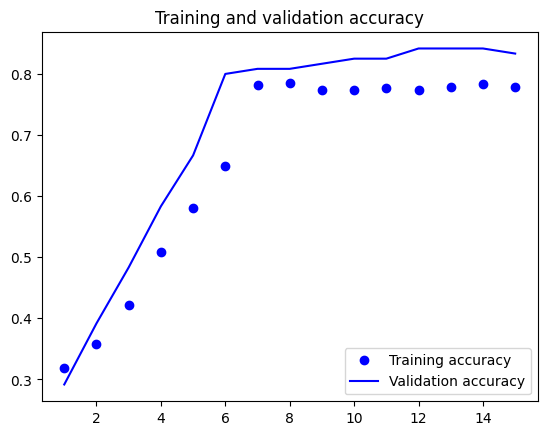

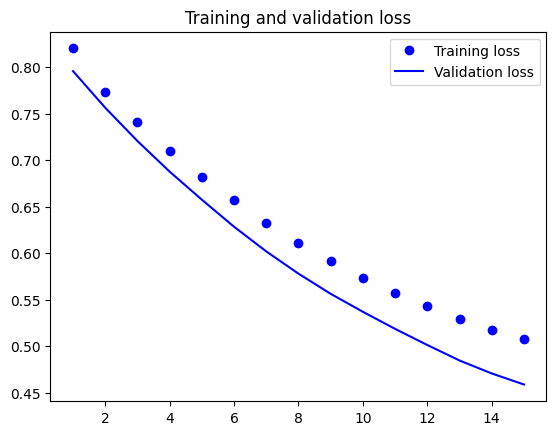

In [192]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### 11. Rebuild and retrain the model for the number of epochs decided in task 10 above.

In [189]:
model = setup_model()

In [190]:
history = model.fit(X_train,
                    y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3276 - loss: 0.8151 - val_accuracy: 0.2917 - val_loss: 0.7958
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3402 - loss: 0.7842 - val_accuracy: 0.3917 - val_loss: 0.7564
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4086 - loss: 0.7433 - val_accuracy: 0.4833 - val_loss: 0.7206
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5035 - loss: 0.7087 - val_accuracy: 0.5833 - val_loss: 0.6877
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5748 - loss: 0.6851 - val_accuracy: 0.6667 - val_loss: 0.6575
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6393 - loss: 0.6627 - val_accuracy: 0.8000 - val_loss: 0.6285
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7683 - loss: 0.6359 - val_accuracy: 0.8083 - val_loss: 0.6019
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7972 - loss: 0.6109 - val_accuracy: 0.8083 - val_loss: 0.5780
Ep

### 12. Evaluate the model on the test dataset to get the test accuracy.

In [193]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.8805038928985596
Test accuracy: 0.5762711763381958


    The accuracy is the same but the loss is greater, don't know what that means.
    It does improve it's loss above 15 epochs but the accuracy keeps going up and down, but never above 0.825

### 13. Calculate precision, recall, and f1-score for the model on the test dataset.

In [242]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["precision", "recall"]) # f1_score don't know what it's actual name is

In [243]:
history = model.fit(X_train,
                    y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.6615 - precision: 0.5427 - recall: 0.4616 - val_loss: 0.6143 - val_precision: 0.6774 - val_recall: 0.5250
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6316 - precision: 0.6211 - recall: 0.3726 - val_loss: 0.5858 - val_precision: 0.6774 - val_recall: 0.5250
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6170 - precision: 0.6823 - recall: 0.3746 - val_loss: 0.5602 - val_precision: 0.7241 - val_recall: 0.5250
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5898 - precision: 0.7941 - recall: 0.3539 - val_loss: 0.5419 - val_precision: 0.7000 - val_recall: 0.5250
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5777 - precision: 0.7921 - recall: 0.3691 - val_loss: 0.5230 - val_precision: 0.7188 - val_recall: 0.5750
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5828 - precision: 0.8116 - recall: 0.4202 - val_loss: 0.5080 - val_precision: 0.7353 - val_recall: 0.6250
Epoch 7/15

In [247]:
#y_pred

In [256]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test precision:", score[1])
print("Test recall:", score[2])

Test loss: 5.9980549812316895
Test precision: 0.4822694957256317
Test recall: 0.5666666626930237


### 14. Plot the Confusion matrix for the test dataset.

In [249]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [250]:
y_pred = y_pred.flatten()

In [253]:
f1_score(y_test, y_pred.round())

0.5210727969348659

In [248]:
#y_test

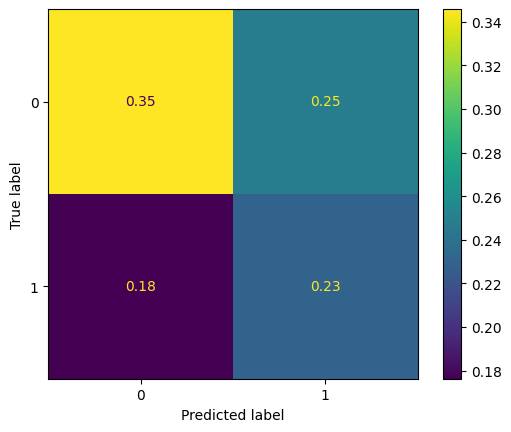

In [254]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred.round(), normalize='all')).plot()
plt.show()

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

## Exercise 3

Based on the **AmesHousing dataset** from the class on regression, make a deep learning regression model to predict the sales price variable.